# Visualize protein evidence for model

For best results, first run the [AggregateData_Proteomics](./AggregateData_Proteomics.ipynb) notebook first to create a table of reviewed proteins detected across published proteomic studies.

## Setup
### Import packages

In [1]:
from collections import defaultdict
import re
import pandas as pd

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from rbc_gem_utils import (
    ROOT_PATH,
    EXTERNAL_PATH,
    INTERIM_PATH,
    read_rbc_model,
    get_annotation_df,
    compare_tables,
    visualize_comparison,
    build_string,
    split_string,
    show_versions,
)

# Display versions of last time notebook ran and worked
show_versions()
plt.rcParams["font.family"] = "Arial"


Package Information
-------------------
rbc-gem-utils 0.0.1

Dependency Information
----------------------
cobra      0.29.0
depinfo     2.2.0
matplotlib  3.8.2
memote     0.16.1
notebook    7.0.6
requests   2.31.0
scipy      1.11.4
seaborn    0.13.0

Build Tools Information
-----------------------
pip        23.3.1
setuptools 68.2.2
wheel      0.41.2

Platform Information
--------------------
Darwin  22.6.0-x86_64
CPython        3.12.0


## Load RBC-GEM model
### Version: 0.2.0

In [2]:
model = read_rbc_model()
model

Set parameter Username
Academic license - for non-commercial use only - expires 2024-11-28


Name,RBC_GEM
Memory address,151e5f410
Number of metabolites,292
Number of reactions,348
Number of genes,283
Number of groups,33
Objective expression,1.0*NaKt - 1.0*NaKt_reverse_db47e
Compartments,"cytosol, extracellular space"


In [3]:
annotation_type = "genes"
df_model_uniprot = get_annotation_df(
    getattr(model, annotation_type),
    ["uniprot", "hgnc.symbol", "ncbigene"],
).rename({"id": annotation_type}, axis=1).set_index(annotation_type)

model_uniprot_ids = df_model_uniprot["uniprot"].unique()
df_model_uniprot.nunique()
df_model_uniprot

,uniprot,hgnc.symbol,ncbigene
genes,,,
NMRK1,Q9NWW6,NMRK1,54981
RPE,Q96AT9,RPE,6120
RPIA,P49247,RPIA,22934
COMTD1,Q86VU5,COMTD1,118881
SORD,Q00796,SORD,6652
...,...,...,...
ATP1B1,P05026,ATP1B1,481
ATP1B3,P54709,ATP1B3,483
ATP1B2,P14415,ATP1B2,482


## Load protein evidence tables
### Load proteomic evidence table

Run the [AggregateData_Proteomics](./AggregateData_Proteomics.ipynb) notebook first to create the protein table.

In [4]:
df_protein_table = pd.read_csv(
    f"{ROOT_PATH}{EXTERNAL_PATH}/proteomics/proteomic_evidence_table.tsv",
    sep="\t",
    index_col=0,
    dtype=str,
)
df_protein_table.columns.name = "pubmed"

df_model_proteins = df_protein_table[df_protein_table.index.isin(model_uniprot_ids)].copy()
for protein in df_model_proteins.index.symmetric_difference(model_uniprot_ids):
    # Proteins with no evidence should be given 0 values across studies.
    df_model_proteins.loc[protein, :] = 0

df_model_proteins = df_model_proteins.astype(int)

# Order by number of proteins detected in a single study
pubmed_ids_ordered = df_model_proteins.sum(axis=0).sort_values(ascending=False).index.values
df_model_proteins = df_model_proteins.loc[:, pubmed_ids_ordered]

# Order by umber of times a single  protein was detected across studies
protein_ids_ordered = df_model_proteins.sum(axis=1).sort_values(ascending=False).index.values
df_model_proteins = df_model_proteins.loc[protein_ids_ordered, :]

# Transport for figure
df_model_proteins = df_model_proteins.T
df_model_proteins

Uniprot,P04406,P04040,P00915,P49247,Q00796,P05089,P36959,P32119,P53004,P00352,...,P23677,P22732,P22413,P22310,P22309,P20839,P20594,P17735,P17707,Q9Y6T7
pubmed,,,,,,,,,,,,,,,,,,,,,
30327373,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
28689405,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
28263177,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
35858567,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
37942280,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
24555563,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
26474164,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
18614565,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
37760001,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0


### Load protein evidence table


In [5]:
try:
    df_previous = pd.read_csv(
        f"{ROOT_PATH}{EXTERNAL_PATH}/database/genes_evidence.tsv",
        sep="\t",
        index_col=0,
        dtype=str,
    ).fillna("")
except :
    df_previous = pd.DataFrame(
        [], columns=[annotation_type], dtype=str).fillna("")
df_previous

,genes


## Aggregate model evidence
### Create new evidence table

In [6]:
compare = True
overwrite = False

,genes,UniProt ID,HGNC Symbol,NCBI Entrez Gene ID,Number of Proteomic Studies,Proteomic Evidence,Additional evidence
0,GAPDH,P04406,GAPDH,2597,19,pubmed:30327373;pubmed:28689405;pubmed:2826317...,
1,CAT,P04040,CAT,847,19,pubmed:30327373;pubmed:28689405;pubmed:2826317...,
2,ARG1,P05089,ARG1,383,17,pubmed:30327373;pubmed:28689405;pubmed:2826317...,
3,ALDH1A1,P00352,ALDH1A1,216,17,pubmed:30327373;pubmed:28689405;pubmed:2826317...,
4,GMPR,P36959,GMPR,2766,17,pubmed:30327373;pubmed:28689405;pubmed:2826317...,
...,...,...,...,...,...,...,...
278,SLC29A2,Q14542,SLC29A2,3177,0,,
279,NADK,O95544,NADK,65220,0,,
280,SLC5A3,P53794,SLC5A3,NaN,0,,
281,SLC5A5,Q92911,SLC5A5,6528,0,,


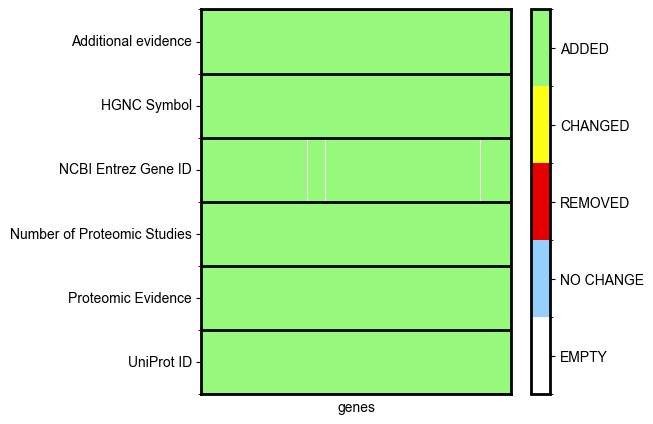

In [7]:
# Create fresh evidence table
df_evidence = pd.concat(
    (
        df_model_proteins.sum(axis=0),
        df_model_proteins.apply(
            lambda series: build_string([
                f"pubmed:{pubmed}"
                for pubmed, is_detected in series.to_dict().items()
                if int(is_detected)
            ]), 
            axis=0
        )
    ), 
    axis=1
)
df_evidence.columns = ["Number of Proteomic Studies", "Proteomic Evidence"]

df_evidence = df_model_uniprot.merge(
    df_evidence,
    left_on="uniprot",
    right_index=True,
    how="left"
).rename({
    # Make nice table titles
    "uniprot": "UniProt ID", 
    "ncbigene": "NCBI Entrez Gene ID",
    "hgnc.symbol": "HGNC Symbol"
}, axis=1)

df_evidence["Additional evidence"] = ""
# Ensure all additional evidence from previous table ends up in new table.

for idx, row in df_evidence.iterrows():
    uniprot = row["UniProt ID"]
    try:
        previous_row = df_previous[df_previous["UniProt ID"] == uniprot]
    except KeyError:
        continue
    else:
        if previous_row.empty:
            continue
    evidence_str = previous_row["Additional evidence"].drop_duplicates().item()
    # evidence_str = previous_row["Additional evidence (PubMed)"]
    df_evidence.loc[idx, "Additional evidence"] = build_string(split_string(evidence_str))

df_evidence = df_evidence.sort_values(by="Number of Proteomic Studies", ascending=False)
df_evidence = df_evidence.reset_index(drop=False)

if compare:
    try:
        df_previous = pd.read_csv(
            f"{ROOT_PATH}{EXTERNAL_PATH}/database/genes_evidence.tsv",
            sep="\t",
            index_col=0,
            dtype=str,
        ).fillna("")
    except :
        df_previous = pd.DataFrame([], columns=[annotation_type], dtype=str).fillna("")

    fig, ax = plt.subplots(1, 1, figsize=(5, 5))
    df_comparision = compare_tables(
        df_previous.set_index(annotation_type),
        df_evidence.set_index(annotation_type),
    )
    ax = visualize_comparison(df_comparision)


if overwrite:
    df_evidence.to_csv(f"{ROOT_PATH}{EXTERNAL_PATH}/database/genes_evidence.tsv", sep="\t")
else:
    df_evidence.to_csv(f"{ROOT_PATH}{INTERIM_PATH}/genes_evidence.tsv", sep="\t")
df_evidence

## Visualize results
### Create evidence summary table

In [8]:
max_pub_count = 15
fontsize = 12
assert max_pub_count  <= df_model_proteins.sum(axis=0).max()

df_value_counts = df_model_proteins.sum(axis=0).value_counts().sort_index()
value_counts = df_value_counts[df_value_counts.index <= max_pub_count].to_dict()
value_counts[max(value_counts.keys())] += df_value_counts[df_value_counts.index > max_pub_count].sum()
value_counts = dict((f'{k}', v) if k != max_pub_count else (f'{k}+',v) for k, v in value_counts.items())

df_additional = df_evidence.loc[:, ["UniProt ID", "Number of Proteomic Studies", "Additional evidence"]]
df_additional = df_additional.drop_duplicates()
df_additional["Additional evidence"] = df_additional["Additional evidence"].apply(lambda x: int(bool(x)))
df_additional = df_additional.drop("UniProt ID", axis=1)
df_additional = df_additional.groupby("Number of Proteomic Studies").sum()
df_additional = df_additional["Additional evidence"].copy()
additional_evidence = df_additional[df_additional.index <= max_pub_count].to_dict()
additional_evidence = dict(
    (f'{k}', v) if k != max_pub_count 
    else (f'{k}+',v) 
    for k, v in additional_evidence.items())

df_value_counts = pd.DataFrame([], columns=["Total", "Additional evidence", "Only proteomic evidence"], dtype=str)

for label, total in value_counts.items():
    df_value_counts.loc[label, "Total"] = total
    df_value_counts.loc[label, "Additional evidence"] = additional_evidence[label]
    df_value_counts.loc[label, "Only proteomic evidence"] = total - additional_evidence[label]
df_value_counts.index.name = "Number of Proteomic Studies"
df_value_counts

,Total,Additional evidence,Only proteomic evidence
Number of Proteomic Studies,,,
0,123,0,123
1,14,0,14
2,11,0,11
3,7,0,7
4,9,0,9
5,4,0,4
6,11,0,11
7,3,0,3
8,8,0,8


### Add colormap to table

In [9]:
cmap = mpl.colormaps.get_cmap("terrain_r")

cmin, cmax = (0.05, 1)
cmap_dict = dict(zip(
    df_value_counts.index,
    cmap(np.linspace(cmin, cmax, len(df_value_counts.index)))
))

df_value_counts_colors = df_value_counts.copy()
df_value_counts_colors["Colors"] = cmap_dict
df_value_counts_colors = df_value_counts_colors.reindex(
    index=df_value_counts_colors.index[::-1]
)
df_value_counts_colors

,Total,Additional evidence,Only proteomic evidence,Colors
Number of Proteomic Studies,,,,
15+,35,0,35,"[0.2, 0.2, 0.6, 1.0]"
14,15,0,15,"[0.11633986928104577, 0.36732026143790847, 0.7..."
13,10,0,10,"[0.032679738562091505, 0.534640522875817, 0.93..."
12,9,0,9,"[0.0, 0.6764705882352942, 0.7705882352941177, ..."
11,11,0,11,"[0.0039215686274509665, 0.8007843137254902, 0...."
10,8,0,8,"[0.2705882352941177, 0.8541176470588235, 0.454..."
9,5,0,5,"[0.5215686274509803, 0.9043137254901961, 0.504..."
8,8,0,8,"[0.7725490196078432, 0.9545098039215686, 0.554..."
7,3,0,3,"[0.9882352941176471, 0.9849411764705882, 0.593..."


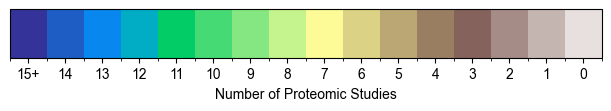

In [10]:
orientation = "horizontal"
figsize = (1 if orientation == 'vertical' else 6, 6 if orientation == 'vertical' else 1)
fig_colorbar, cbar_ax = plt.subplots(figsize=figsize, layout='constrained')


cmap_dict = df_value_counts_colors["Colors"].to_dict()
cmap_segmented = mpl.colors.LinearSegmentedColormap.from_list(
    'legend',
    list(cmap_dict.values()), 
    len(cmap_dict)
)
xticks = list(np.linspace(0, len(cmap_dict) - 1, len(cmap_dict)) + 0.5)
if orientation == "vertical":
    cmap_segmented = cmap_segmented.reversed("legend")
    xticks.reverse()

norm = mpl.colors.BoundaryNorm(
    np.linspace(0, len(cmap_dict), len(cmap_dict) + 1), 
    cmap_segmented.N
)
colorbar = fig_colorbar.colorbar(
    mpl.cm.ScalarMappable(
        norm=norm, 
        cmap=cmap_segmented
    ),
    cax=cbar_ax,
    orientation=orientation,
    label=df_value_counts_colors.index.name,
)
colorbar.set_ticks(
    xticks,
    labels=df_value_counts_colors.index,
)
cbar_ax.set_xlabel(df_value_counts_colors.index.name);
fig_colorbar;

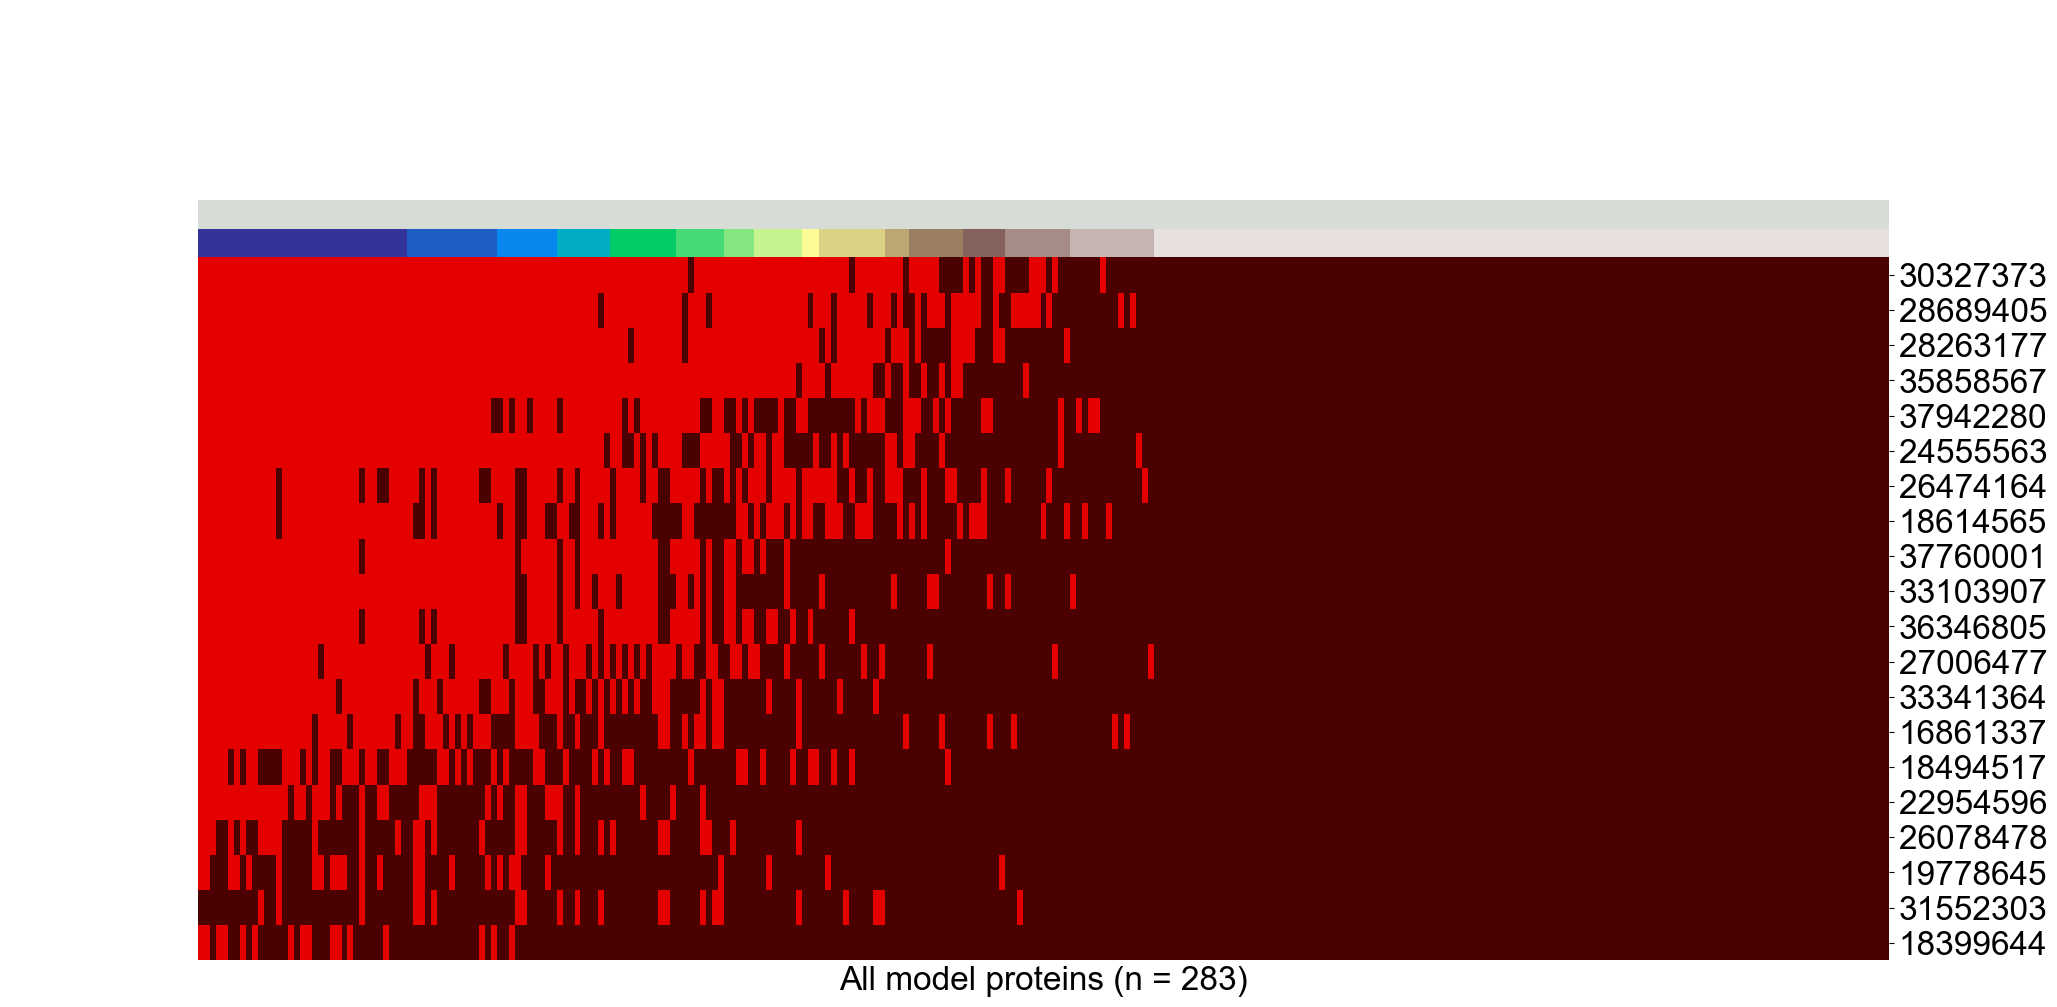

In [11]:
dark, light = ('xkcd:grey', "xkcd:light grey")
df_evidence_cmap = df_evidence[["UniProt ID", "Additional evidence"]].drop_duplicates().copy()
df_evidence_cmap = df_evidence_cmap.loc[df_evidence_cmap.index].set_index("UniProt ID")
df_evidence_cmap = df_evidence_cmap["Additional evidence"].apply(lambda x: dark if bool(x) else light).copy()

df_proteomic_cmap = df_model_proteins.sum()
df_proteomic_cmap = df_proteomic_cmap.apply(lambda x: cmap_dict[f"{x}" if x < max_pub_count else f"{max_pub_count}+"])
df_proteomic_cmap

fig_heatmap = sns.clustermap(
    df_model_proteins,
    figsize=(20, 10),
    row_cluster=False,
    col_cluster=False,
    cbar_pos=None,
    dendrogram_ratio=(.1, .2),
    col_colors=[df_evidence_cmap, df_proteomic_cmap],
    cmap=mpl.colors.ListedColormap(["xkcd:dried blood", "xkcd:red"]),
    xticklabels=False,
)

ax = plt.gca()
ax.set_xlabel(f"All model proteins (n = {len(df_model_proteins.columns)})", fontsize=fontsize * 2)
ax.set_ylabel(None)
ax.yaxis.tick_right()
ax.tick_params(axis='y', labelsize=fontsize *2)
fig_heatmap;

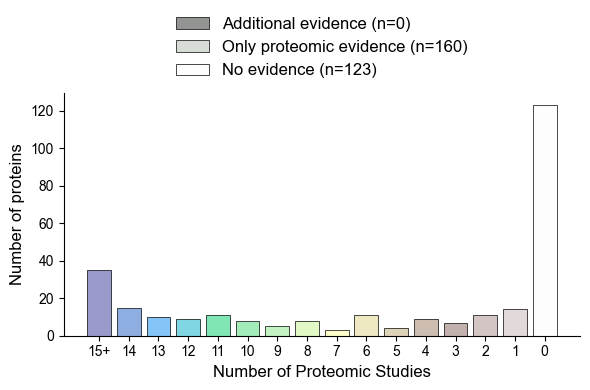

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
sns.despine(fig)

bottom = np.zeros(len(df_value_counts_colors.index))

column_names = ["Additional evidence", "Only proteomic evidence"]
cmaps = dict(zip(column_names, [{}, {}]))

no_evidence = df_value_counts_colors.loc["0"]["Only proteomic evidence"]
no_evidence_color = "xkcd:pale grey"
edgecolor = "black"
lw = 0.5

for key, color in df_value_counts_colors["Colors"].to_dict().items():
    cmaps["Additional evidence"][key] = color
    cmaps["Only proteomic evidence"][key] = [x/2 + 0.5 for x in color]

for label, series in df_value_counts_colors[column_names].items():
    ax.bar(
        list(series.index),
        list(series.values),
        0.8, 
        label=label,
        color=[no_evidence_color 
               if (label == "Only proteomic evidence" and c == "0")
               else cmaps[label][c] 
               for c in series.index],
        bottom=bottom,
        edgecolor=edgecolor,
        linewidth=lw,
    )
    bottom += list(series.values)
df_evidence_counts = df_value_counts_colors[column_names].sum(axis=0)
df_evidence_counts["Only proteomic evidence"] -= no_evidence
handles = [
    mpl.patches.Patch(
        facecolor=facecolor, 
        label=f"{label} (n={n})", 
        edgecolor=edgecolor, 
        linewidth=lw,
    )
    for label, n, facecolor in zip(
        column_names,
        df_evidence_counts.values,
        [dark, light]
    )
]
if no_evidence != 0:
    df_evidence_counts["No evidence"] = no_evidence
    handles += [
        mpl.patches.Patch(
            facecolor=no_evidence_color,
            label=f"No evidence (n={no_evidence})",
            edgecolor=edgecolor,
            linewidth=lw
        )
    ]
    
ax.legend(
    handles=handles, 
    ncol=1,
    loc="lower center", 
    bbox_to_anchor=(0.5, 1, 0, 0), 
    frameon=False,
    fontsize=fontsize
)

ax.set_xlabel(df_value_counts_colors.index.name, fontsize=fontsize)
ax.set_ylabel(f"Number of proteins", fontsize=fontsize)
fig.tight_layout()

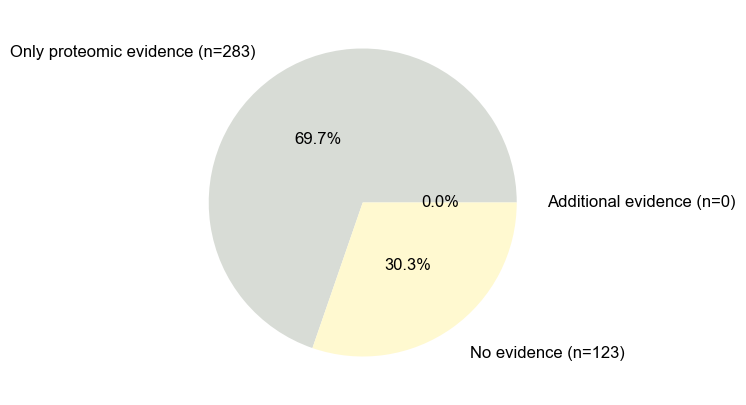

In [13]:
fig, pie_ax = plt.subplots(1, 1, figsize=(5, 5))
sns.despine(fig)

df_evidence_counts = df_value_counts_colors[column_names].sum(axis=0)
colors = [dark, light]
if no_evidence != 0:
    df_evidence_counts["No evidence"] = no_evidence
    colors += ["xkcd:pale"]
    
pie_ax.pie(
    df_evidence_counts.values,
    labels=[f"{label} (n={n})" for label, n in df_evidence_counts.to_dict().items()],
    autopct=lambda x: f"{x:.1f}%",
    textprops={"size": fontsize},
    colors=colors,
    pctdistance=0.5, 
    labeldistance=1.2,
);